In [56]:
import pandas as pd

df_train = pd.read_csv('./data/total_train.csv')

In [57]:
df_train.isnull().sum()

transaction_id              0
apartment_id                0
city                        0
gu                          0
dong                        0
jibun                       0
apt                         0
addr_kr                     0
exclusive_use_area          0
year_of_completion          0
transaction_year_month      0
transaction_date            0
floor                       0
transaction_real_price      0
lat                         0
lng                         0
dist_daycare                0
dist_park                   0
dist_river_park             0
dist_subway                 0
num_subways_100_1000m       0
nearby_subways_100_1000m    0
infra_weighted_score        0
infra                       0
dtype: int64

In [58]:
df_train

,transaction_id,apartment_id,city,gu,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,...,lat,lng,dist_daycare,dist_park,dist_river_park,dist_subway,num_subways_100_1000m,nearby_subways_100_1000m,infra_weighted_score,infra
0,0,7622,서울특별시,종로구,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,...,37.583583,126.967867,0.313544,0.913290,5.692753,1.002637,0,0,1.932716,0.227058
1,1,5399,서울특별시,종로구,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,...,37.576334,126.969340,0.205796,0.758868,5.169633,0.374661,2,"경복궁, 광화문",2.287412,-0.033112
2,2,3578,서울특별시,종로구,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,...,37.578219,126.969724,0.090520,0.784680,5.344415,0.432593,1,경복궁,2.332973,-0.204013
3,3,10957,서울특별시,종로구,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,...,37.574170,126.970544,0.028071,0.735842,5.077732,0.317168,3,"경복궁, 서대문, 광화문",2.472525,-0.179179
4,4,10639,서울특별시,종로구,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,...,37.573280,126.970461,0.123193,0.638931,5.005506,0.386442,3,"경복궁, 서대문, 광화문",2.388258,-0.084931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724743,1196844,996,서울특별시,강동구,강일동,717,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,...,37.559597,127.173087,0.041076,0.112341,3.656264,0.340784,2,"상일동, 강일",2.820146,-0.578513
724744,1196846,682,서울특별시,강동구,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,...,37.566787,127.174602,0.074864,0.181848,3.443433,1.042478,0,0,2.491135,-0.479667
724745,1196847,682,서울특별시,강동구,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,...,37.566787,127.174602,0.074864,0.181848,3.443433,1.042478,0,0,2.491135,-0.479667
724746,1196848,680,서울특별시,강동구,강일동,665,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,...,37.567640,127.172116,0.105664,0.391109,3.259564,1.178679,0,0,2.317044,-0.358165


## EDA

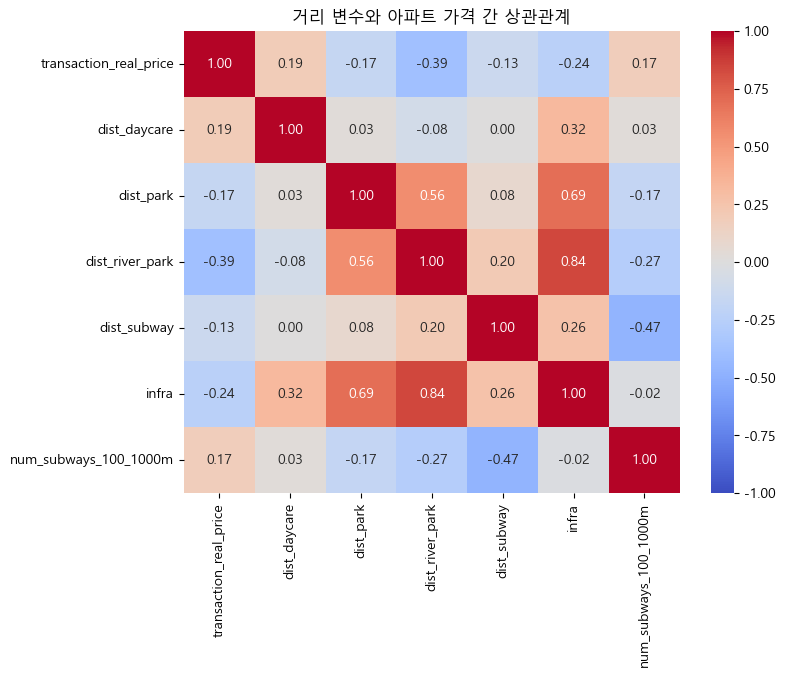

In [59]:
import platform
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import seaborn as sns
import set_matplotlib_hangul


# 분석 대상 컬럼
cols = [
    'transaction_real_price',  # 가격
    'dist_daycare',        # 어린이집
    'dist_park',           # 일반 공원i
    'dist_river_park',     # 한강공원
    'dist_subway',         # 지하철역
    'infra',                # 인프라 점수
    'num_subways_100_1000m'
]

# 상관계수 계산 및 시각화
corr = df_train[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("거리 변수와 아파트 가격 간 상관관계")
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

# ✅ 한글 폰트 설정 (Windows 기준)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False

# ✅ 원본 데이터 복사 및 거리 단위 통일
df_vis = df_train.copy()
df_vis['dist_river_park'] = df_vis['dist_river_park'] * 1000
df_vis['dist_subway'] = df_vis['dist_subway'] * 1000

# ✅ 거리 구간화
df_vis["river_dist_group"] = pd.cut(df_vis["dist_river_park"], bins=[0, 300, 600, 1000, 2000, 5000],
                                    labels=["0-300m", "300-600m", "600-1km", "1-2km", "2km+"])
df_vis["subway_dist_group"] = pd.cut(df_vis["dist_subway"], bins=[0, 300, 600, 1000, 2000, 5000],
                                     labels=["0-300m", "300-600m", "600-1km", "1-2km", "2km+"])

# ✅ 필수 컬럼 결측치 제거
df_vis = df_vis[[
    'transaction_real_price', 'exclusive_use_area', 'year_of_completion',
    'dist_river_park', 'dist_subway', 'apt', 'infra',
    'river_dist_group', 'subway_dist_group'
]].dropna()

# ✅ H1: 전용면적이 클수록 가격이 높다
sns.lmplot(
    x="exclusive_use_area",
    y="transaction_real_price",
    data=df_vis,
    height=5,
    aspect=1.5,
    scatter_kws={"color": "#69b3a2"},
    line_kws={"color": "#ff6f69"}
)
plt.title("H1. 전용면적이 클수록 가격이 높다")
plt.grid(False)
plt.show()

# ✅ H2: 한강이 가까울수록 가격이 높다
sns.barplot(
    x="river_dist_group",
    y="transaction_real_price",
    data=df_vis,
    palette="Blues"
)
plt.title("H2. 한강이 가까울수록 가격이 높다")
plt.grid(False)
plt.show()

# ✅ H3: 최근에 지어진 아파트일수록 가격이 높다
sns.lineplot(
    x="year_of_completion",
    y="transaction_real_price",
    data=df_vis,
    color="#FFA07A"
)
plt.title("H3. 최근에 지어진 아파트일수록 가격이 높다")
plt.grid(False)
plt.show()


# ✅ H4: 지하철이 가까울수록 가격이 높다
sns.barplot(
    x="subway_dist_group",
    y="transaction_real_price",
    data=df_vis,
    palette="Greens"
)
plt.title("H5. 지하철이 가까울수록 가격이 높다")
plt.grid(False)
plt.show()

# ✅ H5: 인프라가 밀집될수록 가격이 높다
df_vis['infra_group'] = pd.qcut(df_vis['infra'], q=5, labels=["매우낮음", "낮음", "보통", "높음", "매우높음"])
sns.barplot(
    x="infra_group",
    y="transaction_real_price",
    data=df_vis,
    palette="Purples"
)
plt.title("H6. 인프라가 밀집될수록 아파트 가격이 높다")
plt.grid(False)
plt.show()


c:\Users\ihdmc\anaconda3\envs\myconda\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


## 머신러닝

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
df_train.columns

Index(['transaction_id', 'apartment_id', 'city', 'gu', 'dong', 'jibun', 'apt',
       'addr_kr', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date', 'floor',
       'transaction_real_price', 'lat', 'lng', 'dist_daycare', 'dist_park',
       'dist_river_park', 'dist_subway', 'num_subways_100_1000m',
       'nearby_subways_100_1000m', 'infra_weighted_score', 'infra'],
      dtype='object')

In [ ]:
df_train

,transaction_id,apartment_id,city,gu,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,...,lat,lng,dist_daycare,dist_park,dist_river_park,dist_subway,num_subways_100_1000m,nearby_subways_100_1000m,infra_weighted_score,infra
0,0,7622,서울특별시,종로구,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,...,37.583583,126.967867,0.313544,0.913290,5.692753,1.002637,0,0,1.932716,0.227058
1,1,5399,서울특별시,종로구,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,...,37.576334,126.969340,0.205796,0.758868,5.169633,0.374661,2,"경복궁, 광화문",2.287412,-0.033112
2,2,3578,서울특별시,종로구,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,...,37.578219,126.969724,0.090520,0.784680,5.344415,0.432593,1,경복궁,2.332973,-0.204013
3,3,10957,서울특별시,종로구,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,...,37.574170,126.970544,0.028071,0.735842,5.077732,0.317168,3,"경복궁, 서대문, 광화문",2.472525,-0.179179
4,4,10639,서울특별시,종로구,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,...,37.573280,126.970461,0.123193,0.638931,5.005506,0.386442,3,"경복궁, 서대문, 광화문",2.388258,-0.084931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724743,1196844,996,서울특별시,강동구,강일동,717,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,...,37.559597,127.173087,0.041076,0.112341,3.656264,0.340784,2,"상일동, 강일",2.820146,-0.578513
724744,1196846,682,서울특별시,강동구,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,...,37.566787,127.174602,0.074864,0.181848,3.443433,1.042478,0,0,2.491135,-0.479667
724745,1196847,682,서울특별시,강동구,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,...,37.566787,127.174602,0.074864,0.181848,3.443433,1.042478,0,0,2.491135,-0.479667
724746,1196848,680,서울특별시,강동구,강일동,665,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,...,37.567640,127.172116,0.105664,0.391109,3.259564,1.178679,0,0,2.317044,-0.358165


In [ ]:
df_train['price_per_m2'] = df_train['transaction_real_price'] / df_train['exclusive_use_area']

# 3. 불필요한 컬럼 제거
drop_cols = ['transaction_id', 'apartment_id', 'jibun', 'addr_kr', 'transaction_date', 'infra_weighted_score', 'dong',
             'nearby_subways_100_1000m', 'exclusive_use_area', 'transaction_real_price', 'lat', 'lng']

df_train.drop(columns=drop_cols, inplace=True)

# 4. 거리 관련 결측치 제거
df_train.dropna(subset=['dist_daycare', 'dist_park', 'dist_river_park', 'dist_subway'], inplace=True)

# 5. Label Encoding (gu 포함!)
for col in ['city', 'apt', 'gu']:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])

# 6. X, y 분리
X = df_train.drop(columns=['price_per_m2'])
y = df_train['price_per_m2']


KeyError: 'transaction_real_price'

In [ ]:
print(X.dtypes[X.dtypes == 'object'])

Series([], dtype: object)


In [ ]:
from sklearn.model_selection import train_test_split

# 80% 학습 / 20% 검증
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_jobs=-1, random_state=42),
    "XGBoost": XGBRegressor(n_jobs=-1, random_state=42),
    "LightGBM": LGBMRegressor(n_jobs=-1, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    
    mae = mean_absolute_error(y_val, preds)
    rmse = mean_squared_error(y_val, preds, squared=False)
    r2 = r2_score(y_val, preds)
    
    print(f"\n📌 {name}")
    print(f"MAE : {mae:,.2f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R²   : {r2:.4f}")



📌 Linear Regression
MAE : 169.90
RMSE: 241.98
R²   : 0.2764

📌 Random Forest
MAE : 41.90
RMSE: 66.87
R²   : 0.9447

📌 XGBoost
MAE : 53.30
RMSE: 77.57
R²   : 0.9256
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2012
[LightGBM] [Info] Number of data points in the train set: 579798, number of used features: 12
[LightGBM] [Info] Start training from score 615.538485

📌 LightGBM
MAE : 67.82
RMSE: 95.99
R²   : 0.8861


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 모델 재학습
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

# 피처 중요도 추출
importances = rf_model.feature_importances_
feature_names = X_train.columns

# 상위 20개 정리
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(20)

print(importance_df)


                   feature  importance
1                       gu    0.356121
9          dist_river_park    0.215203
4       year_of_completion    0.141380
5   transaction_year_month    0.096509
3                      apt    0.040608
8                dist_park    0.029138
2                     dong    0.024947
10             dist_subway    0.024349
6                    floor    0.023252
7             dist_daycare    0.020868
12                   infra    0.016243
11   num_subways_100_1000m    0.011383
0                     city    0.000000


C:\Users\ihdmc\AppData\Local\Temp\ipykernel_18592\4202380534.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


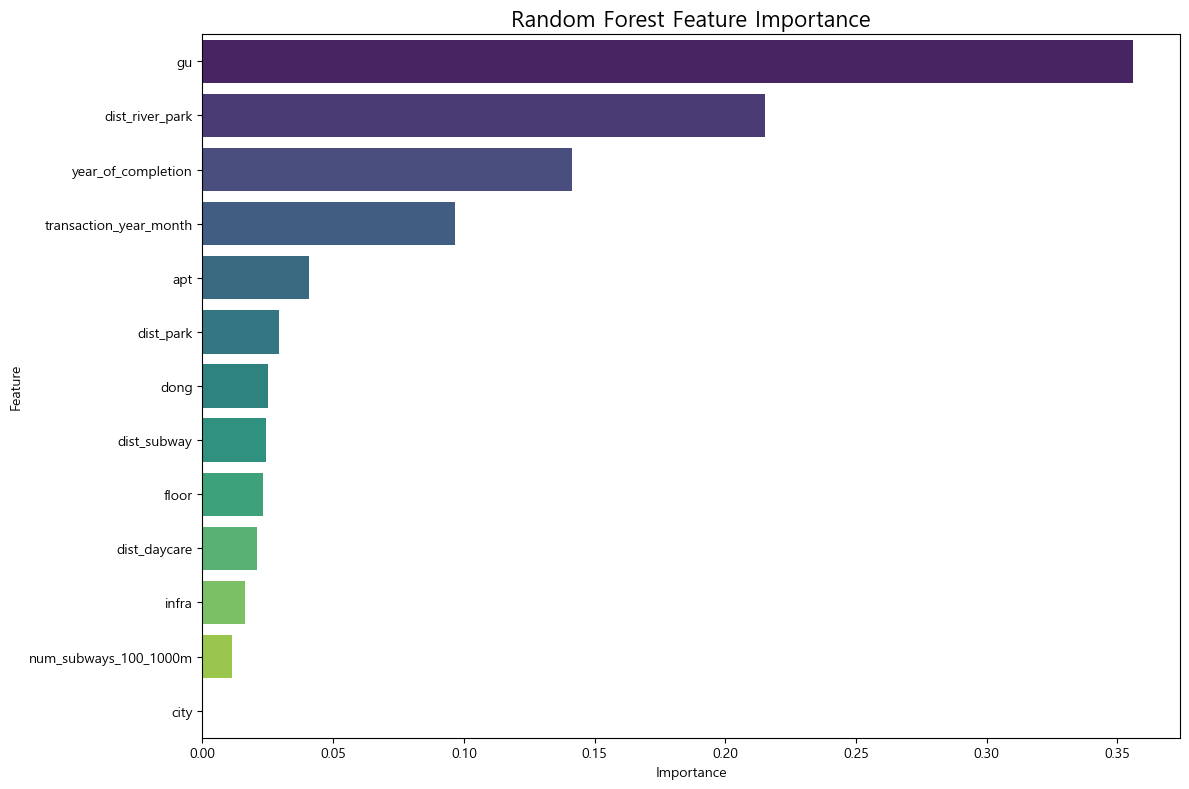

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# 모델 학습
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

# 중요도 계산
importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(15)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(
    data=importance_df,
    x='importance',
    y='feature',
    palette='viridis'
)
plt.title('Random Forest Feature Importance', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
df_test = pd.read_csv("./data/total_test.csv")
# 2. 불필요한 컬럼 제거 (학습 때 제거한 것과 동일하게)

df_test['infra'] = (
    0.183 * ((df_test['dist_daycare'] - df_test['dist_daycare'].mean()) / df_test['dist_daycare'].std()) +
    0.161 * ((df_test['dist_park'] - df_test['dist_park'].mean()) / df_test['dist_park'].std()) +
    0.369 * ((df_test['dist_river_park'] - df_test['dist_river_park'].mean()) / df_test['dist_river_park'].std()) +
    0.121 * ((df_test['dist_subway'] - df_test['dist_subway'].mean()) / df_test['dist_subway'].std()) +
    0.166 * ((df_test['num_subways_100_1000m'] - df_test['num_subways_100_1000m'].mean()) / df_test['num_subways_100_1000m'].std())
)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. total_test.csv 불러오기 (이미 되어 있음 가정)
# df_test = pd.read_csv("./data/total_test.csv")

# 2. 불필요한 컬럼 제거
drop_cols = [
    'transaction_id', 'apartment_id','jibun', 'addr_kr', 'transaction_date', 'dong'.
    'nearby_subways_100_1000m', 'exclusive_use_area', 'transaction_real_price', 'lat', 'lng'
]
df_test.drop(columns=drop_cols, errors='ignore', inplace=True)

# 3. 거리 관련 결측치 제거
df_test.dropna(subset=['dist_daycare', 'dist_park', 'dist_river_park', 'dist_subway'], inplace=True)

# ✅ 4. infra는 이미 생성했으므로 생략!

# 5. Label Encoding (train 기준 + unseen class 처리)
for col in ['city', 'apt', 'gu']:
    le = LabelEncoder()
    le.fit(df_train[col])

    unseen = set(df_test[col]) - set(le.classes_)
    le.classes_ = np.concatenate([le.classes_, list(unseen)])

    df_test[col] = le.transform(df_test[col])

# 6. X_test 생성 (컬럼 순서 train과 동일하게)
X_test_final = df_test[X_train.columns]

# 7. 예측
y_pred_test = model.predict(X_test_final)

# 8. 결과 저장
df_test['predicted_price_per_m2'] = y_pred_test

# 9. 출력 + 저장
print(df_test[['dong', 'gu', 'predicted_price_per_m2']].head())
df_test.to_csv("./data/test_predictions.csv", index=False)


   dong  gu  predicted_price_per_m2
0   490  32              724.767719
1   503  41              702.164783
2   464  30              808.576529
3   576  37             1019.611136
4   585  34              683.596597


In [ ]:
test_data = pd.read_csv('./data/test_predictions.csv')

In [ ]:
test_data

,city,gu,dong,apt,year_of_completion,transaction_year_month,floor,dist_daycare,dist_park,dist_river_park,dist_subway,num_subways_100_1000m,infra,predicted_price_per_m2
0,1,32,490,7367,2002,201711,2,0.233336,0.957041,3.121981,0.283082,2,-0.165556,724.767719
1,1,41,503,8286,2004,201707,10,0.144843,0.885127,2.306344,0.598398,4,-0.096640,702.164783
2,1,30,464,7411,2004,201711,13,0.067814,0.147261,1.790044,0.442398,3,-0.621441,808.576529
3,1,37,576,7619,2008,201712,9,0.127111,1.211961,2.092864,0.590204,2,-0.213137,1019.611136
4,1,34,585,7222,1987,201712,4,0.186268,0.895662,4.491082,0.589204,3,0.129076,683.596597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3853,1,26,440,8868,1988,201712,8,0.276547,0.484883,9.255806,0.152010,3,0.518445,604.184764
3854,1,35,592,8719,2003,201710,7,0.286866,0.288682,4.886954,0.525116,3,0.069972,581.974426
3855,1,35,582,8545,2009,201712,4,0.339423,0.368220,0.902941,0.297880,4,-0.331241,1255.713305
3856,1,45,537,8921,2004,201712,23,0.071283,0.169319,5.696742,0.450663,4,-0.044324,582.643232
